https://github.com/dpapathanasiou/simple-graph-pypi

In [1]:
from simple_graph_sqlite import database as db
from simple_graph_sqlite import visualizers as viz

In [2]:
apple = "apple.sqlite"

In [3]:
db.initialize(apple)

In [4]:
LOAD_DATA = False 

In [14]:
if LOAD_DATA:
    db.atomic(apple, db.add_node({'name': 'Apple Computer Company', 'type':['company', 'start-up'], 'founded': 'April 1, 1976'}, 1))
    db.atomic(apple, db.add_node({'name': 'Steve Wozniak', 'type':['person','engineer','founder']}, 2))
    db.atomic(apple, db.add_node({'name': 'Steve Jobs', 'type':['person','designer','founder']}, 3))
    db.atomic(apple, db.add_node({'name': 'Ronald Wayne', 'type':['person','administrator','founder']}, 4))
    db.atomic(apple, db.add_node({'name': 'Mike Markkula', 'type':['person','investor']}, 5))
    db.atomic(apple, db.connect_nodes(2, 1, {'action': 'founded'}))
    db.atomic(apple, db.connect_nodes(3, 1, {'action': 'founded'}))
    db.atomic(apple, db.connect_nodes(4, 1, {'action': 'founded'}))
    db.atomic(apple, db.connect_nodes(5, 1, {'action': 'invested', 'equity': 80000, 'debt': 170000}))
    db.atomic(apple, db.connect_nodes(1, 4, {'action': 'divested', 'amount': 800, 'date': 'April 12, 1976'}))
    db.atomic(apple, db.connect_nodes(2, 3))
    db.atomic(apple, db.upsert_node(2, {'nickname': 'Woz'}))

    db.atomic(apple, db.add_node({'name': 'Bill Gates', 'type':['person','investor']}, 6))

    db.atomic(apple, db.add_node({'name': '乔布斯', 'type':['person','设计师','创始人']}, 7)) 
    db.atomic(apple, db.connect_nodes(7, 1, {'action': '创立'}))

In [6]:
db.atomic(apple, db.find_node(1))
# {'name': 'Apple Computer Company', 'type': ['company', 'start-up'], 'founded': 'April 1, 1976', 'id': 1}

{'name': 'Apple Computer Company',
 'type': ['company', 'start-up'],
 'founded': 'April 1, 1976',
 'id': 1}

In [12]:
db.atomic(apple, db.find_node(6))

{'name': 'Bill Gates', 'type': ['person', 'investor'], 'id': 6}

In [13]:
db.atomic(apple, db.find_nodes([db._generate_clause('name', predicate='LIKE')], ('Steve%',)))

[('{"name":"Steve Wozniak","type":["person","engineer","founder"],"id":2,"nickname":"Woz"}',), ('{"name":"Steve Jobs","type":["person","designer","founder"],"id":3}',)]


[{'name': 'Steve Wozniak',
  'type': ['person', 'engineer', 'founder'],
  'id': 2,
  'nickname': 'Woz'},
 {'name': 'Steve Jobs', 'type': ['person', 'designer', 'founder'], 'id': 3}]

In [14]:
db.atomic(apple, 
          db.find_nodes([db._generate_clause('name', predicate='LIKE'), db._generate_clause('name', predicate='LIKE', joiner='OR')],
                        ('%Woz%', '%Markkula',))
         )

[('{"name":"Steve Wozniak","type":["person","engineer","founder"],"id":2,"nickname":"Woz"}',), ('{"name":"Mike Markkula","type":["person","investor"],"id":5}',)]


[{'name': 'Steve Wozniak',
  'type': ['person', 'engineer', 'founder'],
  'id': 2,
  'nickname': 'Woz'},
 {'name': 'Mike Markkula', 'type': ['person', 'investor'], 'id': 5}]

In [15]:
db.traverse(apple, 2, 3)

['2', '1', '3']

In [16]:
db.traverse(apple, 4, 5)

['4', '1', '2', '3', '5']

In [17]:
db.traverse(apple, 5, neighbors_fn=db.find_inbound_neighbors)

['5']

In [18]:
db.traverse(apple, 5, neighbors_fn=db.find_outbound_neighbors)

['5', '1', '4']

In [19]:
db.traverse(apple, 5, neighbors_fn=db.find_neighbors)

['5', '1', '2', '3', '4']

In [7]:
viz.graphviz_visualize(apple, 'apple.dot', [4, 1, 5])

In [8]:
from IPython.display import Image

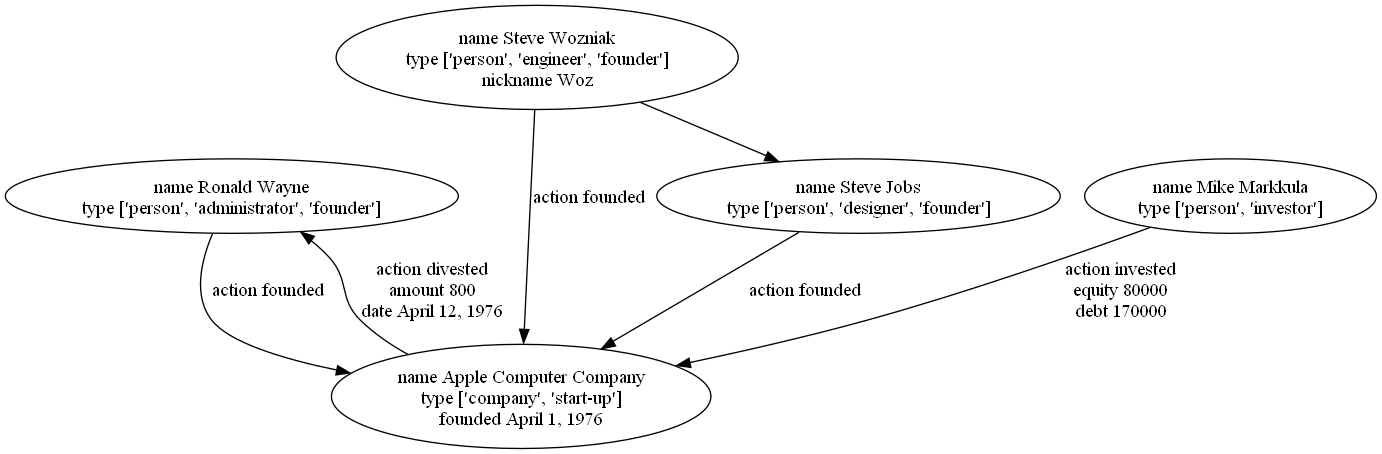

In [9]:
Image(filename="apple.dot.png")

In [15]:
viz.graphviz_visualize(apple, 'apple-2.dot', [4, 1, 5], exclude_node_keys=['type'], hide_edge_key=True)

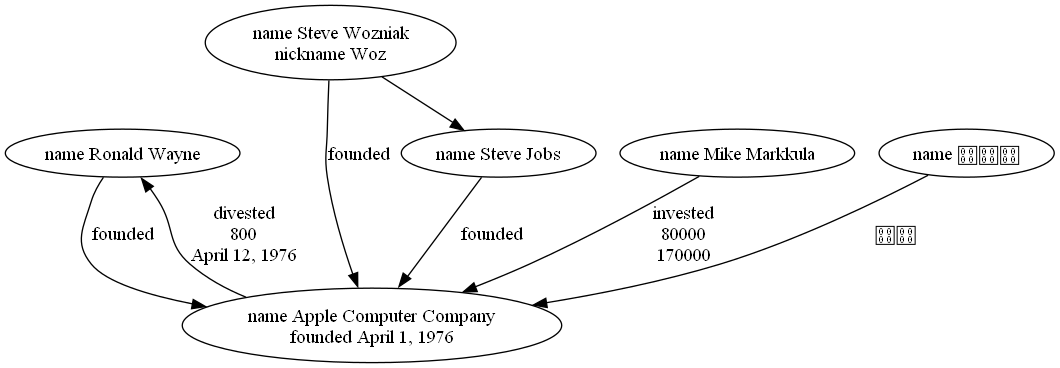

In [16]:
Image(filename="apple-2.dot.png")